# Ner Token Classification 

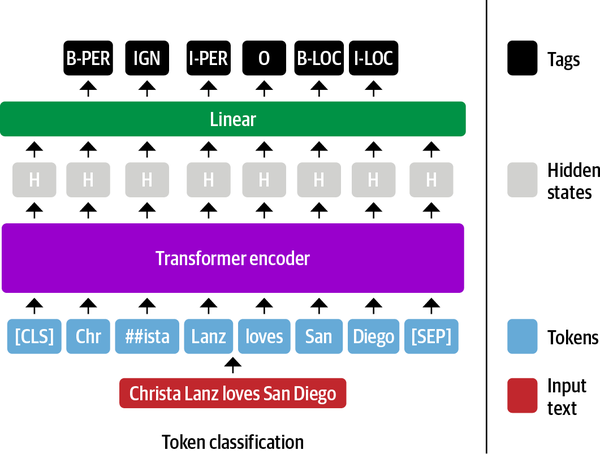

# Initial Project Setup 

In [1]:
# Uncomment and run this cell if you're on Colab or Kaggle
"""
By pretraining on huge corpora across many languages, 
these multilingual transformers enable zero-shot cross-lingual transfer. 
This means that a model that is fine-tuned on one language can be applied to others without any further training!

"""
# !git clone https://github.com/nlp-with-transformers/notebooks.git

# import os
# os.chdir("/content/drive/MyDrive/NLPFinal/FLive")


# from install import *
# install_requirements()

'\nBy pretraining on huge corpora across many languages, \nthese multilingual transformers enable zero-shot cross-lingual transfer. \nThis means that a model that is fine-tuned on one language can be applied to others without any further training!\n\n'

# Device Setup Pytorch

In [1]:
# from utils import *
# setup_chapter()


import pandas as pd
import numpy as np 
import torch 

print(torch.__version__)

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

c:\AI\NLP\NLPProjects\FLive\NER-DVC-Project\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.12.1+cpu
cpu


# DownLoading Benchmark Dataset 

In [2]:
# Data ingestion Phase

from datasets import get_dataset_config_names
from datasets import load_dataset
from datasets import load_from_disk

xtreme_subsets = get_dataset_config_names("xtreme")
print(f"XTREME has {len(xtreme_subsets)} configurations")

XTREME has 183 configurations


In [3]:
panx_subsets = [s for s in xtreme_subsets if s.startswith("PAN")]
print("All PanX languages \n")
print(panx_subsets)

All PanX languages 

['PAN-X.af', 'PAN-X.ar', 'PAN-X.bg', 'PAN-X.bn', 'PAN-X.de', 'PAN-X.el', 'PAN-X.en', 'PAN-X.es', 'PAN-X.et', 'PAN-X.eu', 'PAN-X.fa', 'PAN-X.fi', 'PAN-X.fr', 'PAN-X.he', 'PAN-X.hi', 'PAN-X.hu', 'PAN-X.id', 'PAN-X.it', 'PAN-X.ja', 'PAN-X.jv', 'PAN-X.ka', 'PAN-X.kk', 'PAN-X.ko', 'PAN-X.ml', 'PAN-X.mr', 'PAN-X.ms', 'PAN-X.my', 'PAN-X.nl', 'PAN-X.pt', 'PAN-X.ru', 'PAN-X.sw', 'PAN-X.ta', 'PAN-X.te', 'PAN-X.th', 'PAN-X.tl', 'PAN-X.tr', 'PAN-X.ur', 'PAN-X.vi', 'PAN-X.yo', 'PAN-X.zh']


In [4]:
en = load_dataset("xtreme", name='PAN-X.en')

print("English Dataset \n")
print(en)

Reusing dataset xtreme (C:\Users\Pallavi.Saxena\.cache\huggingface\datasets\xtreme\PAN-X.en\1.0.0\fb182342ff5c7a211ebf678cde070463acd29524b30b87f8f38c617948c2826a)
100%|██████████| 3/3 [00:00<00:00, 171.38it/s]

English Dataset 

DatasetDict({
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 20000
    })
})


# Data Exploration /  Configuration File 

### Train Data exploration

In [5]:
en["train"]

Dataset({
    features: ['tokens', 'ner_tags', 'langs'],
    num_rows: 20000
})

In [6]:
for i in en["train"]:
  print(i)
  break

{'tokens': ['R.H.', 'Saunders', '(', 'St.', 'Lawrence', 'River', ')', '(', '968', 'MW', ')'], 'ner_tags': [3, 4, 0, 3, 4, 4, 0, 0, 0, 0, 0], 'langs': ['en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en']}


In [7]:
for i in en["train"]:
  print(pd.DataFrame(i))
  break

      tokens  ner_tags langs
0       R.H.         3    en
1   Saunders         4    en
2          (         0    en
3        St.         3    en
4   Lawrence         4    en
5      River         4    en
6          )         0    en
7          (         0    en
8        968         0    en
9         MW         0    en
10         )         0    en


In [8]:
pd.DataFrame(en["train"][100]).transpose()

,0,1,2,3,4
tokens,List,of,years,in,Brazil
langs,en,en,en,en,en
ner_tags,3,4,4,4,4


In [9]:
pd.DataFrame(en["train"])

,tokens,ner_tags,langs
0,"[R.H., Saunders, (, St., Lawrence, River, ), (...","[3, 4, 0, 3, 4, 4, 0, 0, 0, 0, 0]","[en, en, en, en, en, en, en, en, en, en, en]"
1,"[;, ', '', Anders, Lindström, '', ']","[0, 0, 0, 1, 2, 0, 0]","[en, en, en, en, en, en, en]"
2,"[Karl, Ove, Knausgård, (, born, 1968, )]","[1, 2, 2, 0, 0, 0, 0]","[en, en, en, en, en, en, en]"
3,"[Atlantic, City, ,, New, Jersey]","[5, 6, 6, 6, 6]","[en, en, en, en, en]"
4,"[Her, daughter, from, the, second, marriage, w...","[0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, ...","[en, en, en, en, en, en, en, en, en, en, en, e..."
...,...,...,...
19995,"[Cicely, Courtneidge, ,, Ernest, Truex]","[1, 2, 0, 1, 2]","[en, en, en, en, en]"
19996,"[Aracaju, ,, Sergipe, ,, Brazil]","[5, 0, 5, 0, 5]","[en, en, en, en, en]"
19997,"[Louisville, in, the, American, Civil, War]","[5, 6, 6, 6, 6, 6]","[en, en, en, en, en, en]"
19998,"[16, (, David, Nugent, )]","[0, 0, 1, 2, 0]","[en, en, en, en, en]"


### Ner Tags

In [10]:
en["train"].features

{'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(num_classes=7, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], names_file=None, id=None), length=-1, id=None),
 'langs': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

In [11]:
en["train"].features["ner_tags"]

Sequence(feature=ClassLabel(num_classes=7, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], names_file=None, id=None), length=-1, id=None)

In [12]:
en["train"].features["ner_tags"].feature.names

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC']

In [13]:
en["train"].features["ner_tags"].feature

ClassLabel(num_classes=7, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], names_file=None, id=None)

In [17]:
en["train"][1]["tokens"]

[';', "'", "''", 'Anders', 'Lindström', "''", "'"]

In [18]:
" ".join(en["train"][1]["tokens"])

"; ' '' Anders Lindström '' '"

In [19]:
len(en["train"][1]["tokens"])

7

In [16]:
en["train"][1]["ner_tags"]

[0, 0, 0, 1, 2, 0, 0]

In [ ]:
# ['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'] --> Labels

### Tags Object

In [19]:
for key, value in en["train"].features.items():
    print(f"{key}: {value}")

tokens: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
ner_tags: Sequence(feature=ClassLabel(num_classes=7, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], names_file=None, id=None), length=-1, id=None)
langs: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)


In [20]:
tags = en["train"].features["ner_tags"].feature
print(tags)

ClassLabel(num_classes=7, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], names_file=None, id=None)


In [21]:
tags.int2str(0)

'O'

In [22]:
tags.str2int('B-PER')

1

In [23]:
# Data train , validation , test 
# train - > tokens, ner_tags, lang
# select ner_tags -> apply int2str as shown  

def create_tag_names(batch):
    return {"ner_tags_str": [tags.int2str(idx) for idx in batch["ner_tags"]]}

new_en = en.map(create_tag_names)

Parameter 'function'=<function create_tag_names at 0x0000022D015A1CA0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.
100%|██████████| 20000/20000 [00:06<00:00, 3001.47ex/s]


In [24]:
pd.DataFrame(new_en["train"])

,tokens,ner_tags,langs,ner_tags_str
0,"[R.H., Saunders, (, St., Lawrence, River, ), (...","[3, 4, 0, 3, 4, 4, 0, 0, 0, 0, 0]","[en, en, en, en, en, en, en, en, en, en, en]","[B-ORG, I-ORG, O, B-ORG, I-ORG, I-ORG, O, O, O..."
1,"[;, ', '', Anders, Lindström, '', ']","[0, 0, 0, 1, 2, 0, 0]","[en, en, en, en, en, en, en]","[O, O, O, B-PER, I-PER, O, O]"
2,"[Karl, Ove, Knausgård, (, born, 1968, )]","[1, 2, 2, 0, 0, 0, 0]","[en, en, en, en, en, en, en]","[B-PER, I-PER, I-PER, O, O, O, O]"
3,"[Atlantic, City, ,, New, Jersey]","[5, 6, 6, 6, 6]","[en, en, en, en, en]","[B-LOC, I-LOC, I-LOC, I-LOC, I-LOC]"
4,"[Her, daughter, from, the, second, marriage, w...","[0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, ...","[en, en, en, en, en, en, en, en, en, en, en, e...","[O, O, O, O, O, O, O, B-PER, I-PER, O, O, O, O..."
...,...,...,...,...
19995,"[Cicely, Courtneidge, ,, Ernest, Truex]","[1, 2, 0, 1, 2]","[en, en, en, en, en]","[B-PER, I-PER, O, B-PER, I-PER]"
19996,"[Aracaju, ,, Sergipe, ,, Brazil]","[5, 0, 5, 0, 5]","[en, en, en, en, en]","[B-LOC, O, B-LOC, O, B-LOC]"
19997,"[Louisville, in, the, American, Civil, War]","[5, 6, 6, 6, 6, 6]","[en, en, en, en, en, en]","[B-LOC, I-LOC, I-LOC, I-LOC, I-LOC, I-LOC]"
19998,"[16, (, David, Nugent, )]","[0, 0, 1, 2, 0]","[en, en, en, en, en]","[O, O, B-PER, I-PER, O]"


In [25]:
de_example = new_en["train"][100]
pd.DataFrame([de_example["tokens"],de_example["ner_tags"] ,de_example["ner_tags_str"]],
['Tokens',"ner_tags" ,'ner_tags_str'])


,0,1,2,3,4
Tokens,List,of,years,in,Brazil
ner_tags,3,4,4,4,4
ner_tags_str,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG


In [26]:
new_en

DatasetDict({
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs', 'ner_tags_str'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs', 'ner_tags_str'],
        num_rows: 10000
    })
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs', 'ner_tags_str'],
        num_rows: 20000
    })
})

# Xlmr - Tokenizer

In [ ]:
# XLM-R - > 250,000
# Instead of using a WordPiece tokenizer, XLM-R uses a tokenizer called SentencePiece.
# Vocab - after tokenization repace with index position
# white spaces as _ to preserve the space

In [14]:
from transformers import AutoTokenizer
xlmr_model_name = "xlm-roberta-base"
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)

In [15]:
xlmr_tokenizer('Hello my name is')

{'input_ids': [0, 35378, 759, 9351, 83, 2], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [16]:
xlmr_tokens = xlmr_tokenizer('Hello my name is pallavi and i am working at avalara').tokens()
xlmr_tokens 

['<s>',
 '▁Hello',
 '▁my',
 '▁name',
 '▁is',
 '▁palla',
 'vi',
 '▁and',
 '▁i',
 '▁am',
 '▁working',
 '▁at',
 '▁ava',
 'lara',
 '</s>']

# Custom Model Building with Pytorch and hugging face
## Model Architecture file

![nlpt_0404](https://user-images.githubusercontent.com/40850370/176989445-bbf9d48d-3244-4176-b7e0-9440a4ff1b37.png)


In [17]:
# we will use RoBERTa as the base model but augmented with settings specific to XLM-R. 
# The config_class ensures that the standard XLM-R settings are used when we initialize a new model.
# Note that we set add_​pool⁠ing_layer=False to ensure all hidden states are returned and not only the one associated with the [CLS] token.
# Finally, we initialize all the weights by calling the init_weights()

import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput
from transformers.models.roberta.modeling_roberta import RobertaModel
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel

class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
    config_class = XLMRobertaConfig

    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels
        # Load model body
        self.roberta = RobertaModel(config, add_pooling_layer=False)
        # Set up token classification head 
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
        # Load and initialize weights
        self.init_weights()

    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None,
                labels=None, **kwargs):
        # Use model body to get encoder representations
        outputs = self.roberta(input_ids, attention_mask=attention_mask,
                               token_type_ids=token_type_ids, **kwargs)
        # Apply classifier to encoder representation
        sequence_output = self.dropout(outputs[0])
        logits = self.classifier(sequence_output)
        # Calculate losses
        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
        # Return model output object
        return TokenClassifierOutput(loss=loss, logits=logits,
                                     hidden_states=outputs.hidden_states,
                                     attentions=outputs.attentions)

# Auto Configuration 

In [ ]:
# The AutoConfig class contains the blueprint of a model’s architecture. 
# some additional information beyond the model name, 
# including the tags that we will use to label each entity and the mapping of each tag to an ID and vice versa.

In [27]:
index2tag = {idx: tag for idx, tag in enumerate(tags.names)}
tag2index = {tag: idx for idx, tag in enumerate(tags.names)}

In [28]:
index2tag

{0: 'O',
 1: 'B-PER',
 2: 'I-PER',
 3: 'B-ORG',
 4: 'I-ORG',
 5: 'B-LOC',
 6: 'I-LOC'}

In [ ]:
tag2index

{'B-LOC': 5,
 'B-ORG': 3,
 'B-PER': 1,
 'I-LOC': 6,
 'I-ORG': 4,
 'I-PER': 2,
 'O': 0}

In [ ]:
xlmr_model_name

'xlm-roberta-base'

In [ ]:
tags.num_classes

7

In [ ]:
from transformers import AutoConfig

xlmr_config = AutoConfig.from_pretrained(xlmr_model_name, 
                                         num_labels=tags.num_classes,
                                         id2label=index2tag, label2id=tag2index)

In [ ]:
xlmr_model_name

'xlm-roberta-base'

In [ ]:
xlmr_config

XLMRobertaConfig {
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "O",
    "1": "B-PER",
    "2": "I-PER",
    "3": "B-ORG",
    "4": "I-ORG",
    "5": "B-LOC",
    "6": "I-LOC"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "B-LOC": 5,
    "B-ORG": 3,
    "B-PER": 1,
    "I-LOC": 6,
    "I-ORG": 4,
    "I-PER": 2,
    "O": 0
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.11.3",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}

# Quick Prediction

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


print(device)


xlmr_model = (XLMRobertaForTokenClassification.from_pretrained(xlmr_model_name, config=xlmr_config).to(device))

cuda


Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

In [ ]:
new_en["train"][100]

{'langs': ['en', 'en', 'en', 'en', 'en'],
 'ner_tags': [3, 4, 4, 4, 4],
 'ner_tags_str': ['B-ORG', 'I-ORG', 'I-ORG', 'I-ORG', 'I-ORG'],
 'tokens': ['List', 'of', 'years', 'in', 'Brazil']}

In [ ]:
" ".join(new_en["train"][100]["tokens"])

'List of years in Brazil'

In [ ]:
text ='List of years in Brazil'


input_ids = xlmr_tokenizer.encode(text, return_tensors="pt")

In [ ]:
input_ids

tensor([[    0, 32036,   111,  5369,    23, 30089,     2]])

In [ ]:
outputs = xlmr_model(input_ids.to(device)).logits

predictions = torch.argmax(outputs, dim=-1)

print(f"Number of tokens in sequence: {len(xlmr_tokens)}")

print(f"Shape of outputs: {outputs.shape}")

Number of tokens in sequence: 16
Shape of outputs: torch.Size([1, 7, 7])


In [ ]:
data = [i.item() for i in predictions[0]]
data

[1, 6, 6, 6, 4, 6, 1]

In [ ]:
index2tag

{0: 'O',
 1: 'B-PER',
 2: 'I-PER',
 3: 'B-ORG',
 4: 'I-ORG',
 5: 'B-LOC',
 6: 'I-LOC'}

In [ ]:
[index2tag[idx] for idx in data][1:-1]

['I-LOC', 'I-LOC', 'I-LOC', 'I-ORG', 'I-LOC']

In [ ]:
['B-ORG', 'I-ORG', 'I-ORG', 'I-ORG', 'I-ORG']

In [ ]:
preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
pd.DataFrame([xlmr_tokens, preds], index=["Tokens", "Tags"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Tokens,<s>,▁Hello,▁my,▁name,▁is,▁ke,tan,▁and,▁i,▁am,▁working,▁at,▁in,euro,n,</s>
Tags,B-PER,I-LOC,I-LOC,I-LOC,I-ORG,I-LOC,B-PER,None,None,None,None,None,None,None,None,None


In [ ]:
def tag_text(text, tags, model, tokenizer):
    # Get tokens with special characters
    tokens = tokenizer(text).tokens()
    # Encode the sequence into IDs
    input_ids = xlmr_tokenizer(text, return_tensors="pt").input_ids.to(device)
    # Get predictions as distribution over 7 possible classes
    outputs = model(input_ids)[0]
    # Take argmax to get most likely class per token
    predictions = torch.argmax(outputs, dim=2)
    # Convert to DataFrame
    preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
    return pd.DataFrame([tokens, preds], index=["Tokens", "Tags"])

  

# Tokenizing Texts for NER

In [ ]:
de_example = new_en["train"][8]

In [ ]:
# In this example we can see that the tokenizer has split, 
# Since we’re following the convention that only first word
# should be associated with the B-LOC label, we need a way to mask the 
# subword representations after the first subword. Fortunately, 
# tokenized_input is a class that contains a word_ids() function that can help us achieve this:

words, labels = de_example["tokens"], de_example["ner_tags"]
words, labels

(['*Inducted',
  'into',
  'the',
  'United',
  'States',
  'Hockey',
  'Hall',
  'of',
  'Fame',
  'in',
  '2015'],
 [0, 0, 0, 3, 4, 4, 4, 4, 4, 0, 0])

In [ ]:
tokenized_input = xlmr_tokenizer(de_example["tokens"], is_split_into_words=True)
tokenized_input

{'input_ids': [0, 661, 4153, 77193, 297, 3934, 70, 14098, 46684, 193171, 19449, 111, 52917, 13, 23, 918, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokens = xlmr_tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
tokens

['<s>',
 '▁*',
 'In',
 'duct',
 'ed',
 '▁into',
 '▁the',
 '▁United',
 '▁States',
 '▁Hockey',
 '▁Hall',
 '▁of',
 '▁Fam',
 'e',
 '▁in',
 '▁2015',
 '</s>']

In [ ]:
word_ids = tokenized_input.word_ids()
word_ids

[None, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 10, None]

##Concept
 
Why did we choose –100 as the ID to mask subword representations? The reason is that in PyTorch the cross-entropy loss class torch.nn.CrossEntropyLoss has an attribute called ignore_index whose value is –100. This index is ignored during training, so we can use it to ignore the tokens associated with consecutive subwords.

[0, 0, 0, 3, 4, 4, 4, 4, 4, 0, 0]

In [ ]:
[index2tag[idx] for idx in [0, 0, 0, 3, 4, 4, 4, 4, 4, 0, 0]][1:-1]

['O', 'O', 'B-ORG', 'I-ORG', 'I-ORG', 'I-ORG', 'I-ORG', 'I-ORG', 'O']

In [ ]:
new_en["train"][8]['tokens']

['*Inducted',
 'into',
 'the',
 'United',
 'States',
 'Hockey',
 'Hall',
 'of',
 'Fame',
 'in',
 '2015']

In [ ]:
previous_word_idx = None
label_ids = []

for word_idx in word_ids:
    if word_idx is None or word_idx == previous_word_idx:
        label_ids.append(-100)
    elif word_idx != previous_word_idx:
        label_ids.append(labels[word_idx])
    previous_word_idx = word_idx

labels = [index2tag[l] if l != -100 else "IGN" for l in label_ids]
index = ["Tokens", "Word IDs", "Label IDs", "Labels"]

pd.DataFrame([tokens, word_ids, label_ids, labels], index=index)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Tokens,<s>,▁*,In,duct,ed,▁into,▁the,▁United,▁States,▁Hockey,▁Hall,▁of,▁Fam,e,▁in,▁2015,</s>
Word IDs,None,0,0,0,0,1,2,3,4,5,6,7,8,8,9,10,None
Label IDs,-100,0,-100,-100,-100,0,0,3,4,4,4,4,4,-100,0,0,-100
Labels,IGN,O,IGN,IGN,IGN,O,O,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,IGN,O,O,IGN


In [ ]:
# O	Outside of a named entity
# B-MIS	Beginning of a miscellaneous entity right after another miscellaneous entity
# I-MIS	Miscellaneous entity
# B-PER	Beginning of a person’s name right after another person’s name
# I-PER	Person’s name
# B-ORG	Beginning of an organization right after another organization
# I-ORG	organization
# B-LOC	Beginning of a location right after another location
# I-LOC	Location

# IGN - Ignore

In [ ]:
new_en["train"][8]["ner_tags"]

[0, 0, 0, 3, 4, 4, 4, 4, 4, 0, 0]

In [ ]:
# apply this to whole dataset
def tokenize_and_align_labels(examples):
    tokenized_inputs = xlmr_tokenizer(examples["tokens"], truncation=True,
                                      is_split_into_words=True)
    labels = []
    for idx, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=idx)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None or word_idx == previous_word_idx:
                label_ids.append(-100)
            else:
                label_ids.append(label[word_idx])
            previous_word_idx = word_idx
        labels.append(label_ids)
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [ ]:
def encode_panx_dataset(corpus):
    return corpus.map(tokenize_and_align_labels, batched=True,
                      remove_columns=['langs', 'ner_tags', 'tokens'])

In [ ]:
["wordId","index_id","label id","labels","attention mask"]

['wordId', 'index_id', 'label id', 'labels']

In [ ]:
panx_en_encoded = encode_panx_dataset(new_en) 

  0%|          | 0/10 [00:00<?, ?ba/s]

  0%|          | 0/10 [00:00<?, ?ba/s]

  0%|          | 0/20 [00:00<?, ?ba/s]

In [ ]:
panx_en_encoded

DatasetDict({
    validation: Dataset({
        features: ['attention_mask', 'input_ids', 'labels', 'ner_tags_str'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['attention_mask', 'input_ids', 'labels', 'ner_tags_str'],
        num_rows: 10000
    })
    train: Dataset({
        features: ['attention_mask', 'input_ids', 'labels', 'ner_tags_str'],
        num_rows: 20000
    })
})

# Prediction Matrics

#### Evaluating a NER model is similar to evaluating a text classification model, and it is common to report results for precision, recall, and F1-score. The only subtlety is that all words of an entity need to be predicted correctly in order for a prediction to be counted as correct.

In [ ]:
# class 1, class 2 , class 3 , class 4 

# f1 score 

# 0 -- 0  -- 1
# 0 -- 1 -- loss


In [ ]:
from seqeval.metrics import classification_report

In [ ]:
new_en["train"][100]["tokens"]

['List', 'of', 'years', 'in', 'Brazil']

In [ ]:
new_en["train"][100]["ner_tags_str"]

['B-ORG', 'I-ORG', 'I-ORG', 'I-ORG', 'I-ORG']

In [ ]:
y_true = [["O", "O", "O", "B-MISC", "I-MISC", "I-MISC", "O"],
          ["B-PER", "I-PER", "O"]]

y_pred = [["O", "O", "O", "B-MISC", "I-MISC", "I-MISC", "O"],
          ["B-PER", "I-PER", "O"]]


print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        MISC       1.00      1.00      1.00         1
         PER       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
import numpy as np

def align_predictions(predictions, label_ids):
    preds = np.argmax(predictions, axis=2)

    batch_size, seq_len = preds.shape
    
    labels_list, preds_list = [], []

    for batch_idx in range(batch_size):

        example_labels, example_preds = [], []

        for seq_idx in range(seq_len):
            # Ignore label IDs = -100

            if label_ids[batch_idx, seq_idx] != -100:
                example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])
                example_preds.append(index2tag[preds[batch_idx][seq_idx]])

        labels_list.append(example_labels)
        preds_list.append(example_preds)

    return preds_list, labels_list

In [ ]:
from transformers import TrainingArguments

num_epochs = 10

batch_size = 24

logging_steps = len(panx_en_encoded["train"].select(range(100))) // batch_size

model_name = f"{xlmr_model_name}-finetuned-panx-en"

training_args = TrainingArguments(
    output_dir=model_name, 
    log_level="error", 
    num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size, 
    evaluation_strategy="epoch",
    save_steps=1e6, 
    weight_decay=0.01,
    disable_tqdm=False,
    logging_steps=logging_steps
    )

In [ ]:
training_args

TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_find_unused_parameters=None,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_steps=None,
evaluation_strategy=IntervalStrategy.EPOCH,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
hub_model_id=None,
hub_strategy=HubStrategy.EVERY_SAVE,
hub_token=<HUB_TOKEN>,
ignore_data_skip=False,
label_names=None,
label_smoothing_factor=0.0,
learning_rate=5e-05,
length_column_name=length,
load_best_model_at_end=False,
local_rank=-1,
log_level=40,
log_level_replica=-1,
log_on_each_node=True,
logging_dir=xlm-roberta-base-finetuned-panx-en/runs/Jul03_11-23-04_f312fb9c0021,
logging_first_step=False,
logging_nan_

In [ ]:
from seqeval.metrics import f1_score

def compute_metrics(eval_pred):
    y_pred, y_true = align_predictions(eval_pred.predictions,
                                       eval_pred.label_ids)
    return {"f1": f1_score(y_true, y_pred)}

In [ ]:
# The final step is to define a data collator so we can pad each input sequence 
# to the largest sequence length in a batch. nlpt_pin01 Transformers provides a
# dedicated data collator for token classification that will pad the labels along with the inputs:

from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

In [ ]:
def model_init():
    return (XLMRobertaForTokenClassification
            .from_pretrained(xlmr_model_name, config=xlmr_config)
            .to(device))

In [ ]:
from transformers import Trainer

trainer = Trainer(model_init=model_init, args=training_args,
                  data_collator=data_collator, compute_metrics=compute_metrics,
                  train_dataset=panx_en_encoded["train"].select(range(100)),
                  eval_dataset=panx_en_encoded["validation"].select(range(10)),
                  tokenizer=xlmr_tokenizer
                  )

In [ ]:
trainer

In [ ]:
trainer.train() 

RuntimeError: ignored

# Model Prediction 

In [ ]:
input_ids = xlmr_tokenizer(new_en["validation"][:10]["tokens"],truncation=True,
                                      is_split_into_words=True)


In [ ]:
data = torch.tensor(panx_en_encoded["train"][100]["input_ids"])
data = data.reshape(1,-1)

In [ ]:
outputs = xlmr_model(data.to(device)).logits
predictions = torch.argmax(outputs, dim=-1)
print(f"Number of tokens in sequence: {len(data[0])}")
print(f"Shape of outputs: {outputs.shape}")

Number of tokens in sequence: 7
Shape of outputs: torch.Size([1, 7, 7])


In [ ]:
" ".join(xlmr_tokenizer.convert_ids_to_tokens(panx_en_encoded["train"][100]["input_ids"]))

'<s> ▁List ▁of ▁years ▁in ▁Brazil </s>'

In [ ]:
torch.tensor(panx_en_encoded["train"][100]["input_ids"])

tensor([    0, 32036,   111,  5369,    23, 30089,     2])

In [ ]:
outputs

tensor([[[ 0.0037,  0.6568, -0.2085, -0.0830,  0.4190,  0.0767,  0.5666],
         [ 0.0207,  0.2468, -0.1751, -0.0992,  0.3972, -0.0444,  0.4521],
         [-0.0048,  0.2397, -0.2031, -0.0315,  0.4254, -0.0377,  0.4270],
         [ 0.0523,  0.1699, -0.2234, -0.0967,  0.4113, -0.1359,  0.4607],
         [-0.0247,  0.1967, -0.2325, -0.0700,  0.4143, -0.0340,  0.4010],
         [-0.0233,  0.1587, -0.1098, -0.1136,  0.4753,  0.0159,  0.4871],
         [-0.0074,  0.6713, -0.1953, -0.0820,  0.4041,  0.1023,  0.5879]]],
       device='cuda:0', grad_fn=<AddBackward0>)

In [ ]:
data

tensor([[    0,   602,    31,  6077, 69944, 40024,    15,   602,    31,  6077,
         69944,     6,     4, 25134,   930, 38898,  1388,     2]])

In [ ]:
tokens = xlmr_tokenizer.convert_ids_to_tokens(data[0])
" ".join(tokens)

'<s> ▁Si o ux ▁Falls ▁Arena ▁( ▁Si o ux ▁Falls ▁ , ▁South ▁Da kota ▁) </s>'

In [ ]:
pred_tags = [index2tag[i.item()] for i in predictions[0]][1:-1]
pred_tags

['I-LOC', 'I-LOC', 'I-LOC', 'I-ORG', 'I-LOC']

In [ ]:

" ".join([index2tag[i.item()] for i in predictions[0]])

'B-PER I-LOC I-LOC I-LOC I-ORG I-LOC B-PER'

In [ ]:
index2tag

{0: 'O',
 1: 'B-PER',
 2: 'I-PER',
 3: 'B-ORG',
 4: 'I-ORG',
 5: 'B-LOC',
 6: 'I-LOC'}

In [ ]:
output = xlmr_tokenizer.convert_tokens_to_string(tokens)

In [ ]:
output[3:-4].split()

['Sioux', 'Falls', 'Arena', '(', 'Sioux', 'Falls', ',', 'South', 'Dakota', ')']

In [ ]:
pd.Series([index2tag[i] for i in [i for i in panx_en_encoded["validation"][0]['labels'] if i!= -100 ]])

0    B-ORG
1    I-ORG
2    I-ORG
3        O
4    B-LOC
5    I-LOC
6    I-LOC
7    I-LOC
8    I-LOC
9        O
dtype: object

In [ ]:
pd.Series(output[3:-4].split())

0     Sioux
1     Falls
2     Arena
3         (
4     Sioux
5     Falls
6         ,
7     South
8    Dakota
9         )
dtype: object

In [ ]:
panx_en_encoded["validation"][0]['labels']

[-100, 3, -100, -100, 4, 4, 0, 5, -100, -100, 6, 6, -100, 6, 6, -100, 0, -100]

In [ ]:
xlmr_tokenizer.convert_ids_to_tokens(panx_en_encoded["validation"][0]["input_ids"])

['<s>',
 '▁Si',
 'o',
 'ux',
 '▁Falls',
 '▁Arena',
 '▁(',
 '▁Si',
 'o',
 'ux',
 '▁Falls',
 '▁',
 ',',
 '▁South',
 '▁Da',
 'kota',
 '▁)',
 '</s>']

In [ ]:
panx_en_encoded["validation"][0]['ner_tags_str']

['B-ORG',
 'I-ORG',
 'I-ORG',
 'O',
 'B-LOC',
 'I-LOC',
 'I-LOC',
 'I-LOC',
 'I-LOC',
 'O']